In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv("greendestination (1) (1).csv") 
print("Shape of Dataset is : "df.shape) 
print(df.head(5))

(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

In [4]:
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

attrition_rate = (df['Attrition'].sum() / len(df)) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Attrition Rate: 16.12%


In [6]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Model : 1 - Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.891156462585034
[[249   6]
 [ 26  13]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



In [8]:
# Model : 2 - Decision Tree 

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7653061224489796


In [9]:
# model : 3 - Random Forest [BEST MODEL]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8639455782312925
[[250   5]
 [ 35   4]]


In [10]:
importances = rf.feature_importances_
features = X.columns

feature_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_imp)


                     Feature  Importance
17             MonthlyIncome    0.074968
21                  OverTime    0.064823
0                        Age    0.056865
2                  DailyRate    0.050505
27         TotalWorkingYears    0.048104
18               MonthlyRate    0.047090
8             EmployeeNumber    0.045296
11                HourlyRate    0.043352
4           DistanceFromHome    0.042012
30            YearsAtCompany    0.041914
19        NumCompaniesWorked    0.036035
14                   JobRole    0.032731
22         PercentSalaryHike    0.032530
26          StockOptionLevel    0.031840
33      YearsWithCurrManager    0.028512
31        YearsInCurrentRole    0.027299
13                  JobLevel    0.026893
32   YearsSinceLastPromotion    0.026549
28     TrainingTimesLastYear    0.025413
15           JobSatisfaction    0.025368
16             MaritalStatus    0.025151
9    EnvironmentSatisfaction    0.024602
6             EducationField    0.023972
12            Jo

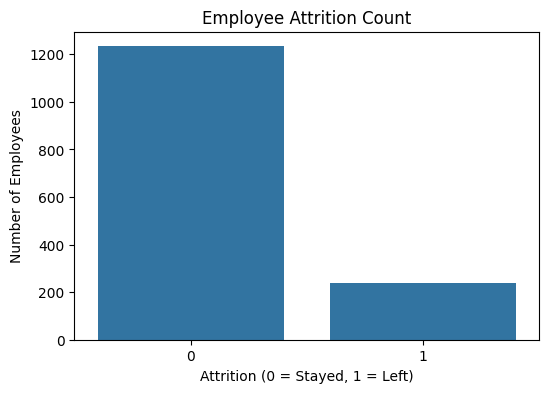

In [16]:
# 1. Attrition Count
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Employees")
plt.show()


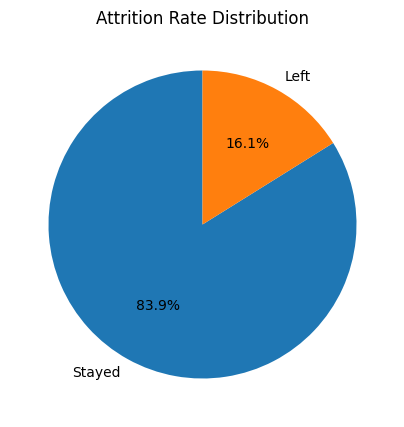

In [17]:
# 2. Attrition Rate Pie Chart
plt.figure(figsize=(5,5))
df['Attrition'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=['Stayed', 'Left']
)
plt.title("Attrition Rate Distribution")
plt.ylabel("")
plt.show()

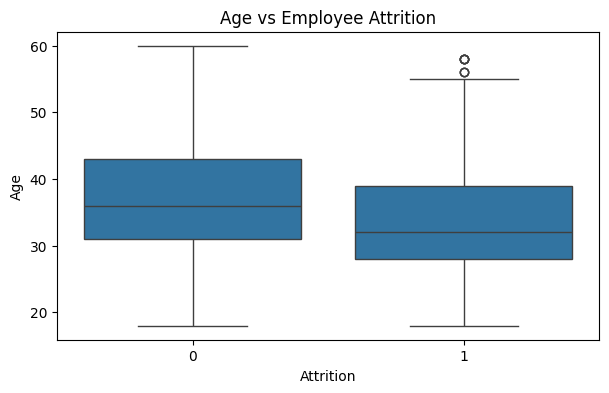

In [18]:

# 3. Age vs Attrition
plt.figure(figsize=(7,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Employee Attrition")
plt.show()


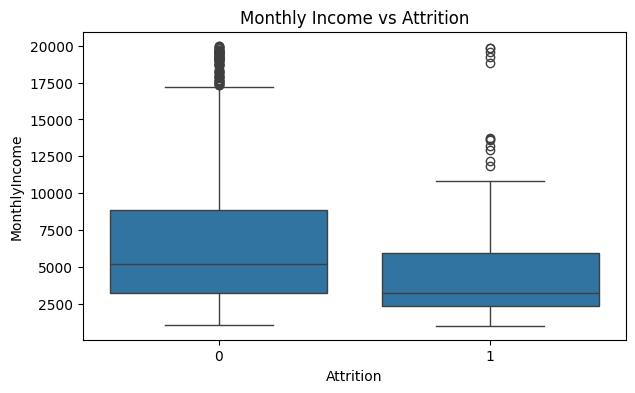

In [19]:
# 4. Monthly Income vs Attrition
plt.figure(figsize=(7,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


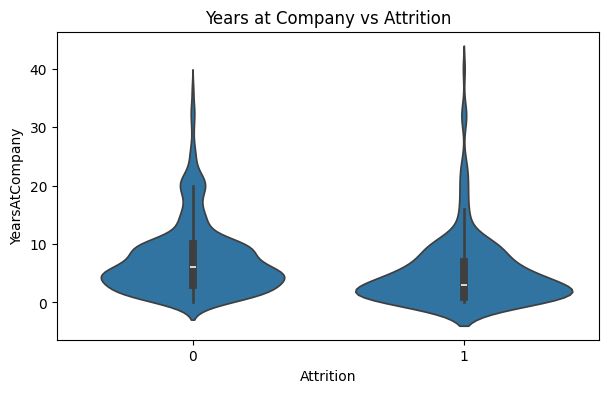

In [20]:
# 5. Years at Company vs Attrition
plt.figure(figsize=(7,4))
sns.violinplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Years at Company vs Attrition")
plt.show()


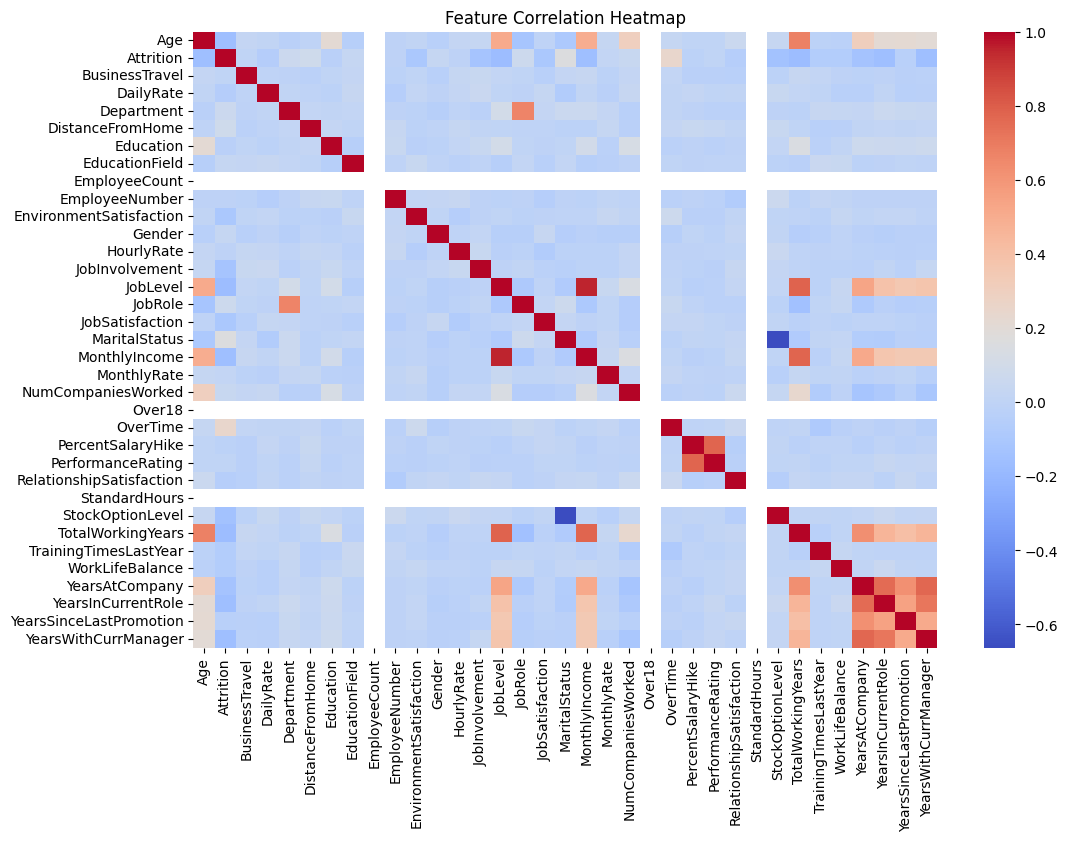

In [21]:
# 6. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()